In [67]:
!pip install sparse_lmm

In [68]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA dataset/TCGA_Stomach_Cancer_(STAD)/TCGA.STAD.sampleMap_STAD_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA dataset/TCGA_Stomach_Cancer_(STAD)/TCGA.STAD.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [69]:
gene_data

,TCGA-FP-A4BE-01,TCGA-BR-8081-01,TCGA-HU-A4GP-11,TCGA-IN-7806-01,TCGA-BR-4257-01,TCGA-RD-A8N6-01,TCGA-D7-8575-01,TCGA-VQ-A94P-01,TCGA-CD-A4MG-01,TCGA-IN-A6RO-01,...,TCGA-IN-AB1V-11,TCGA-D7-6522-01,TCGA-KB-A6F7-01,TCGA-BR-8690-01,TCGA-CG-5734-11,TCGA-CG-5730-11,TCGA-VQ-A8DV-01,TCGA-D7-6527-01,TCGA-BR-A4PD-01,TCGA-BR-8295-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.224808,0.614508,-0.051192,2.248808,-0.589492,1.744208,-0.217192,0.417608,0.905108,1.053308,...,1.374108,0.460408,-1.622792,0.287608,-0.413692,0.397508,-0.354192,-0.607492,-1.010092,-0.886392
HIF3A,-1.747726,-0.110026,6.499874,4.360074,-3.200826,6.345474,2.179874,4.146274,-0.331526,-1.225426,...,4.819474,0.926574,2.738074,2.096374,1.363174,0.988874,4.681074,-0.642026,-1.119126,4.094974
RNF17,-0.531035,-0.531035,0.273965,-0.531035,-0.531035,-0.531035,-0.037735,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,8.319665,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,8.553665
RNF10,-0.257772,0.026728,0.397228,0.252328,-0.484872,-0.058472,0.202628,0.389528,0.015228,-0.069372,...,0.694328,-0.146772,0.432328,0.061828,-0.045072,-0.067172,-0.255272,0.294828,0.080528,0.850728
RNF11,0.019122,-0.550378,1.116122,-0.463778,-0.431178,-0.000678,-0.074578,1.165622,-0.390978,-0.815278,...,1.132622,-0.537778,-0.078378,-0.151778,0.207622,0.418622,-0.204978,-0.691078,0.027222,-0.469978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTRF,-1.479386,-0.249686,2.537014,-0.739786,-0.630386,1.017814,-0.750086,2.130414,-0.128786,-2.789086,...,1.078714,1.509114,-2.224186,0.288814,-0.233386,-0.371186,0.053114,0.058814,-0.494586,-1.098086
BCL6B,0.645873,1.188673,0.843873,-0.595127,0.069073,-0.529927,-1.555027,2.022273,0.833373,-2.136927,...,-1.182727,1.679673,-0.299327,-1.257227,0.015873,-0.227727,-0.084127,0.602873,-0.095027,1.225573
GSTK1,0.216105,1.518105,-0.604495,0.730305,0.011505,-0.513095,-0.944295,-0.407195,0.881305,0.639605,...,-0.484495,1.003905,-0.232695,0.928305,2.125405,1.768505,1.591305,0.100605,0.426805,-0.580495


In [70]:
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,additional_surgery_metastatic_procedure,...,_GENOMIC_ID_TCGA_STAD_exp_HiSeq_exon,_GENOMIC_ID_TCGA_STAD_exp_GA,_GENOMIC_ID_TCGA_STAD_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_STAD_mutation_broad_gene,_GENOMIC_ID_TCGA_STAD_PDMRNAseq,_GENOMIC_ID_data/public/TCGA/STAD/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_STAD_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_STAD_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_STAD_exp_HiSeq,_GENOMIC_ID_TCGA_STAD_miRNA_GA
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,MSS,TCGA-3M-AB46-01,TCGA-3M-AB46,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,TCGA-3M-AB46-01A-11R-A414-31,NaN,ffa0dfbd-83fa-4e47-b448-a7d922ca4e4a,NaN,TCGA-3M-AB46-01,TCGA-3M-AB46-01,ffa0dfbd-83fa-4e47-b448-a7d922ca4e4a,NaN,TCGA-3M-AB46-01A-11R-A414-31,NaN
TCGA-3M-AB47-01,MSI-L,TCGA-3M-AB47-01,TCGA-3M-AB47,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NO,NO,NO,NaN,...,TCGA-3M-AB47-01A-22R-A414-31,NaN,8ed72b3f-bec0-400b-a391-7763d5bccd57,NaN,TCGA-3M-AB47-01,TCGA-3M-AB47-01,8ed72b3f-bec0-400b-a391-7763d5bccd57,NaN,TCGA-3M-AB47-01A-22R-A414-31,NaN
TCGA-B7-5816-01,MSI-H,TCGA-B7-5816-01,TCGA-B7-5816,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,TCGA-B7-5816-01A-21R-1602-13,NaN,cc969bc1-8daa-4b05-b15b-822c41343ebc,NaN,TCGA-B7-5816-01,TCGA-B7-5816-01,cc969bc1-8daa-4b05-b15b-822c41343ebc,NaN,TCGA-B7-5816-01A-21R-1602-13,NaN
TCGA-B7-5818-01,MSI-L,TCGA-B7-5818-01,TCGA-B7-5818,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,TCGA-B7-5818-01A-11R-1602-13,NaN,8d4db1f2-5af0-4192-8f63-a36c98f5cf2b,NaN,TCGA-B7-5818-01,TCGA-B7-5818-01,8d4db1f2-5af0-4192-8f63-a36c98f5cf2b,NaN,TCGA-B7-5818-01A-11R-1602-13,NaN
TCGA-B7-A5TI-01,MSI-H,TCGA-B7-A5TI-01,TCGA-B7-A5TI,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,TCGA-B7-A5TI-01A-11R-A31P-31,NaN,fba4eaa9-3fb9-4673-a71a-1a1440afbc15,TCGA-B7-A5TI-01A-11D-A31L-08,TCGA-B7-A5TI-01,TCGA-B7-A5TI-01,fba4eaa9-3fb9-4673-a71a-1a1440afbc15,TCGA-B7-A5TI-01A-11D-A31L-08,TCGA-B7-A5TI-01A-11R-A31P-31,NaN


In [71]:
gene_data.head()

,TCGA-FP-A4BE-01,TCGA-BR-8081-01,TCGA-HU-A4GP-11,TCGA-IN-7806-01,TCGA-BR-4257-01,TCGA-RD-A8N6-01,TCGA-D7-8575-01,TCGA-VQ-A94P-01,TCGA-CD-A4MG-01,TCGA-IN-A6RO-01,...,TCGA-IN-AB1V-11,TCGA-D7-6522-01,TCGA-KB-A6F7-01,TCGA-BR-8690-01,TCGA-CG-5734-11,TCGA-CG-5730-11,TCGA-VQ-A8DV-01,TCGA-D7-6527-01,TCGA-BR-A4PD-01,TCGA-BR-8295-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.224808,0.614508,-0.051192,2.248808,-0.589492,1.744208,-0.217192,0.417608,0.905108,1.053308,...,1.374108,0.460408,-1.622792,0.287608,-0.413692,0.397508,-0.354192,-0.607492,-1.010092,-0.886392
HIF3A,-1.747726,-0.110026,6.499874,4.360074,-3.200826,6.345474,2.179874,4.146274,-0.331526,-1.225426,...,4.819474,0.926574,2.738074,2.096374,1.363174,0.988874,4.681074,-0.642026,-1.119126,4.094974
RNF17,-0.531035,-0.531035,0.273965,-0.531035,-0.531035,-0.531035,-0.037735,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,8.319665,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,8.553665
RNF10,-0.257772,0.026728,0.397228,0.252328,-0.484872,-0.058472,0.202628,0.389528,0.015228,-0.069372,...,0.694328,-0.146772,0.432328,0.061828,-0.045072,-0.067172,-0.255272,0.294828,0.080528,0.850728
RNF11,0.019122,-0.550378,1.116122,-0.463778,-0.431178,-0.000678,-0.074578,1.165622,-0.390978,-0.815278,...,1.132622,-0.537778,-0.078378,-0.151778,0.207622,0.418622,-0.204978,-0.691078,0.027222,-0.469978


In [87]:
gene_fullname = 'BRCA gene'
gene = 'brca'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Stomach Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 107 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-FP-A4BE-01,1.224808,-1.747726,-0.531035,-0.257772,0.019122,-0.37631,-0.627894,0.050754,-0.423399,2.842428,...,1.038622,-1.587117,0.393267,-0.70569,-0.439777,-1.479386,0.645873,0.216105,-1.013033,-0.252312
TCGA-BR-8081-01,0.614508,-0.110026,-0.531035,0.026728,-0.550378,-0.39861,-0.846094,1.182054,0.615701,-0.477872,...,0.019522,0.588183,1.038367,-1.28139,-0.140877,-0.249686,1.188673,1.518105,2.037867,-0.196712
TCGA-HU-A4GP-11,-0.051192,6.499874,0.273965,0.397228,1.116122,0.09599,0.592806,2.941254,0.034601,-1.093372,...,1.890322,1.215483,-1.329833,-1.28139,1.126223,2.537014,0.843873,-0.604495,3.168467,-1.328312
TCGA-IN-7806-01,2.248808,4.360074,-0.531035,0.252328,-0.463778,-0.76811,-0.311694,0.710954,-0.423399,0.375328,...,-0.328778,-0.159517,-0.831733,1.79511,0.444823,-0.739786,-0.595127,0.730305,1.368767,-0.576912
TCGA-BR-4257-01,-0.589492,-3.200826,-0.531035,-0.484872,-0.431178,0.42599,-0.364494,-0.891646,1.097201,-0.734172,...,-0.748878,-1.587117,0.984467,-1.28139,-0.030677,-0.630386,0.069073,0.011505,-0.249133,-0.383412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CG-5730-11,0.397508,0.988874,-0.531035,-0.067172,0.418622,-1.13731,-0.795394,1.311454,2.888501,-0.563072,...,-0.748878,0.404483,0.269567,-1.28139,-1.177777,-0.371186,-0.227727,1.768505,1.507767,0.771588
TCGA-VQ-A8DV-01,-0.354192,4.681074,-0.531035,-0.255272,-0.204978,-0.57321,0.819106,-0.657846,0.379301,3.521528,...,1.490522,-0.271617,-1.529833,1.35341,0.844423,0.053114,-0.084127,1.591305,0.056367,0.668588
TCGA-D7-6527-01,-0.607492,-0.642026,-0.531035,0.294828,-0.691078,-0.38201,0.580306,1.555654,-0.423399,2.225028,...,-0.193378,-0.061617,0.219967,0.24411,0.132723,0.058814,0.602873,0.100605,2.971367,-0.222512
TCGA-BR-A4PD-01,-1.010092,-1.119126,-0.531035,0.080528,0.027222,0.01709,-0.021194,2.039054,0.732701,0.326428,...,-0.748878,-1.587117,0.282667,3.36701,-0.350677,-0.494586,-0.095027,0.426805,0.510567,-0.263512


In [88]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,additional_surgery_metastatic_procedure,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,MSS,TCGA-3M-AB46-01,TCGA-3M-AB46,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,0.213122,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512
TCGA-3M-AB47-01,MSI-L,TCGA-3M-AB47-01,TCGA-3M-AB47,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NO,NO,NO,NaN,...,-0.254978,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988
TCGA-B7-5816-01,MSI-H,TCGA-B7-5816-01,TCGA-B7-5816,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612
TCGA-B7-5818-01,MSI-L,TCGA-B7-5818-01,TCGA-B7-5818,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,0.818922,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312
TCGA-B7-A5TI-01,MSI-H,TCGA-B7-A5TI-01,TCGA-B7-A5TI,TCGA Stomach Cancer (STAD),stomach adenocarcinoma,Stomach,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812


In [89]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,0.0,2.168708,-0.956226,-0.531035,0.135928,0.349322,0.14139,-0.419494,0.617054,2.509401,...,0.213122,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512
TCGA-3M-AB47-01,0.0,1.309708,1.160674,-0.037135,0.210328,0.313322,-0.28301,-0.415794,1.218654,1.524101,...,-0.254978,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988
TCGA-B7-5816-01,-18698.0,-0.045892,-2.968626,-0.531035,-0.206872,-0.105678,0.15469,-0.937094,1.262254,-0.423399,...,-0.748878,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612
TCGA-B7-5818-01,-22792.0,0.076608,5.843574,-0.531035,-0.190272,-0.647478,-0.02321,-0.576694,-1.346446,-0.423399,...,0.818922,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312
TCGA-B7-A5TI-01,-19014.0,0.046908,5.233774,-0.531035,-0.108772,-0.233578,0.21699,-1.040094,1.087354,-0.423399,...,-0.748878,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812


In [90]:

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Stomach Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,0.0,2.168708,-0.956226,-0.531035,0.135928,0.349322,0.14139,-0.419494,0.617054,2.509401,...,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512,1
TCGA-3M-AB47-01,0.0,1.309708,1.160674,-0.037135,0.210328,0.313322,-0.28301,-0.415794,1.218654,1.524101,...,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988,1
TCGA-B7-5816-01,-18698.0,-0.045892,-2.968626,-0.531035,-0.206872,-0.105678,0.15469,-0.937094,1.262254,-0.423399,...,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612,1
TCGA-B7-5818-01,-22792.0,0.076608,5.843574,-0.531035,-0.190272,-0.647478,-0.02321,-0.576694,-1.346446,-0.423399,...,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312,1
TCGA-B7-A5TI-01,-19014.0,0.046908,5.233774,-0.531035,-0.108772,-0.233578,0.21699,-1.040094,1.087354,-0.423399,...,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812,1


In [91]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

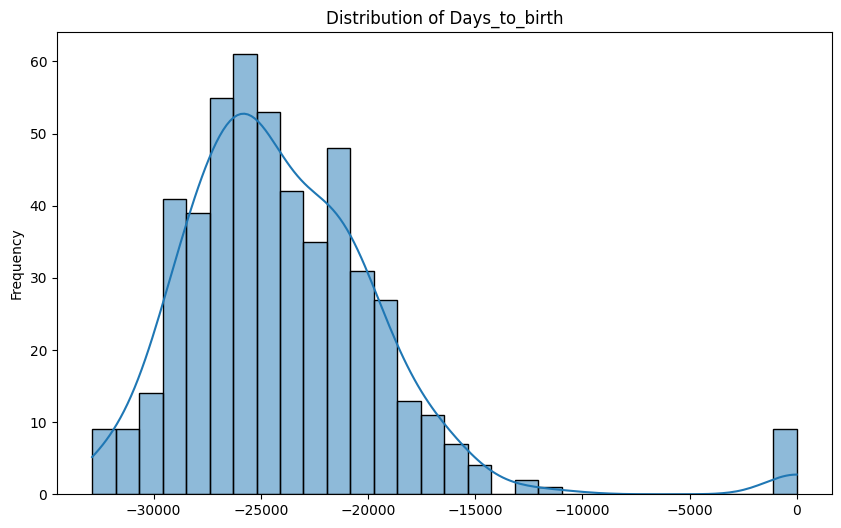

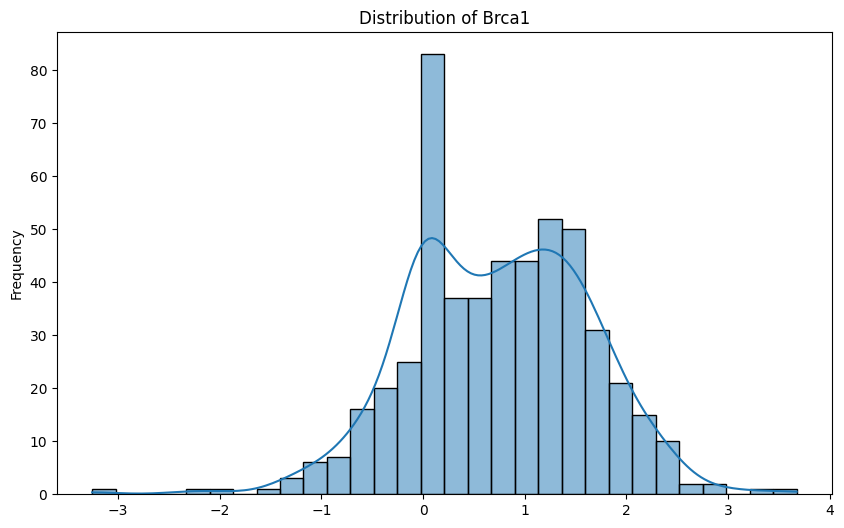

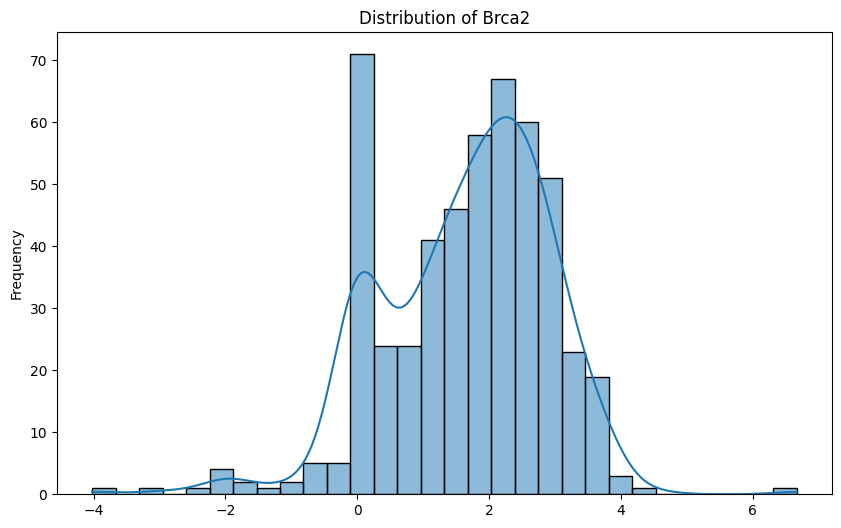

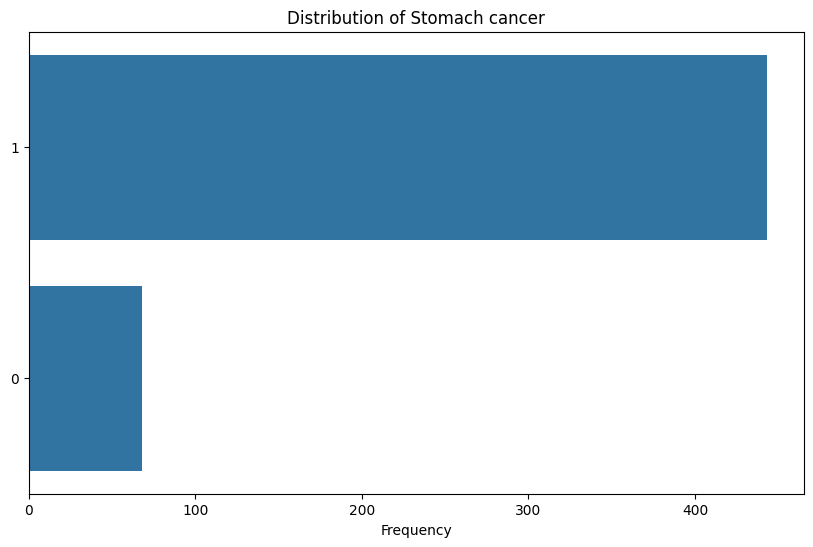

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

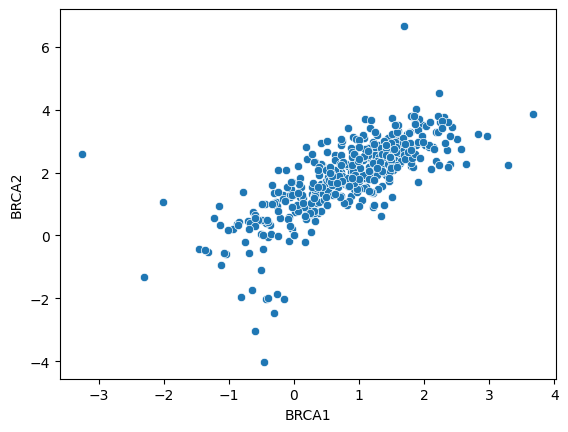

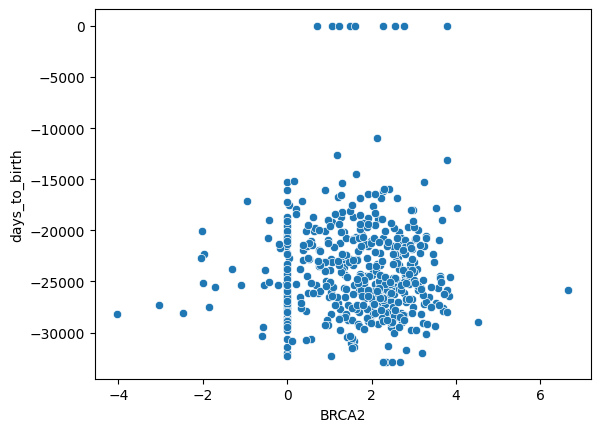

In [93]:
sns.scatterplot(data=merged_data, x='BRCA1', y='BRCA2')
plt.show()
sns.scatterplot(data=merged_data, x='BRCA2', y=condition_col)
plt.show()

In [94]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Stomach Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3M-AB46-01,0,2.168708,-0.956226,-0.531035,0.135928,0.349322,0.14139,-0.419494,0.617054,2.509401,...,-1.587117,-0.417833,1.55901,-1.051477,-0.604886,-0.131827,0.312605,-2.890033,-0.648512,1
TCGA-3M-AB47-01,0,1.309708,1.160674,-0.037135,0.210328,0.313322,-0.28301,-0.415794,1.218654,1.524101,...,0.973083,0.544567,-0.42039,-0.167577,0.791514,1.148673,0.948205,4.198067,0.045988,1
TCGA-B7-5816-01,51,-0.045892,-2.968626,-0.531035,-0.206872,-0.105678,0.15469,-0.937094,1.262254,-0.423399,...,-1.587117,0.180067,-1.28139,-0.364377,1.504414,0.564673,0.272405,1.328567,-0.153612,1
TCGA-B7-5818-01,62,0.076608,5.843574,-0.531035,-0.190272,-0.647478,-0.02321,-0.576694,-1.346446,-0.423399,...,-1.587117,1.134367,-1.28139,-0.446777,-0.529386,-0.050027,1.929905,-2.179533,-0.431312,1
TCGA-B7-A5TI-01,52,0.046908,5.233774,-0.531035,-0.108772,-0.233578,0.21699,-1.040094,1.087354,-0.423399,...,-1.587117,0.381167,2.98761,0.239123,-0.326586,1.278873,0.907905,1.724767,-0.197812,1


In [95]:
merged_data.values

array([[ 0.00000000e+00,  2.16870753e+00, -9.56226336e-01, ...,
        -2.89003328e+00, -6.48512400e-01,  1.00000000e+00],
       [ 0.00000000e+00,  1.30970753e+00,  1.16067366e+00, ...,
         4.19806672e+00,  4.59876005e-02,  1.00000000e+00],
       [ 5.10000000e+01, -4.58924698e-02, -2.96862634e+00, ...,
         1.32856672e+00, -1.53612400e-01,  1.00000000e+00],
       ...,
       [ 5.90000000e+01,  4.86507530e-01,  2.74837366e+00, ...,
         7.00466719e-01,  2.29687600e-01,  1.00000000e+00],
       [ 7.10000000e+01,  1.32210753e+00,  3.22207366e+00, ...,
         3.19046672e+00, -6.97212400e-01,  1.00000000e+00],
       [ 7.90000000e+01, -1.39239247e+00, -1.75962634e+00, ...,
         3.60256672e+00,  9.90387600e-01,  1.00000000e+00]])

In [96]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

C:\Users\Bobibob\AppData\Local\Temp\ipykernel_11224\2284219672.py:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.753364090734333


In [97]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [98]:
# Print regression result

gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For brca:
BRCA1: Coefficient = -0.005507297926811235, p-value = 0.9546459876771229
BRCA2: Coefficient = 0.014022409659674917, p-value = 0.9093222359592177

For age:
age: Coefficient = -0.03861864385925608, p-value = 0.06472045592538392



In [99]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between BRCA gene and Stomach Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the BRCA gene and Stomach Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the BRCA gene and Stomach Cancer when considering the influence of age.




In [100]:
# Interpretation of Regression Coefficients

threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: BRCA1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: BRCA2
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).




In [101]:
# Hypothesis Confirmation and Conclusion

# Create a function to determine if H0 or H1 is confirmed
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: BRCA1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA1 gene and Stomach Cancer when considering the influence of age.

Variable: BRCA2
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA2 gene and Stomach Cancer when considering the influence of age.


